In [16]:
# %load Deterministic Select.py
#!/usr/bin/env python3
import sys
import argparse
import random
import numpy as np 
import time
import math
sys.setrecursionlimit(3000)


# first command line argument is the array size
array_size = 10000#int(sys.argv[1])+0

# read the value of k (i.e we are looking for the k-th smallest value in the array)
k = 5000#int(sys.argv[2]) + 0

m = 11#int(sys.argv[3])

# fill the array with random values
my_array = [random.randint(1,100*array_size) for _ in range(array_size)]

# sort the array and pick the k-th smallest element from the sorted-array
def sort_and_select(current_array, k) :
    # sort the array
    sorted_current_array = np.sort(current_array)
    return sorted_current_array[k]

def deterministic_select(current_array, k, m) :
    if (len(current_array) <= m) :
        # just use any method to pick the k-th smallest element in the array
        # I am using the sort-and-select method here
        return sort_and_select(current_array, k)
    else : 
        # I need this array to compute the median-of-medians...
        medians_of_smaller_arrays_of_size_m = []
        
        # first, split current_array into smaller arrays with 5 elements each
        # there might be a better way than what I am doing... but this will work... 
        for i in range(0,len(current_array),m):
            smaller_array_of_size_m = []
            smaller_array_of_size_m.extend([current_array[i]])
            for j in range(1, m):
                if (i + j < len(current_array)) :
                    smaller_array_of_size_m.extend([current_array[i+j]])

            # we need each of these cases as len(smaller_array_of_size_m) can be anything between 1 and 5
            # based on len(smaller_array_of_size_m) we are computing the median of smaller_array_of_size_m for each case
            if (len(smaller_array_of_size_m) == 1) :
                medians_of_smaller_arrays_of_size_m.extend([smaller_array_of_size_m[0]])
            elif (len(smaller_array_of_size_m) == 2) :
                medians_of_smaller_arrays_of_size_m.extend([(smaller_array_of_size_m[0]+smaller_array_of_size_m[1])/2]) 
            elif (len(smaller_array_of_size_m) % 2 == 1):
                medians_of_smaller_arrays_of_size_m.extend([deterministic_select(smaller_array_of_size_m, int((len(smaller_array_of_size_m) + 1) / 2), m)])
            elif (len(smaller_array_of_size_m) % 2 == 0):
                medians_of_smaller_arrays_of_size_m.extend([(deterministic_select(smaller_array_of_size_m,int(len(smaller_array_of_size_m) / 2), m)+deterministic_select(smaller_array_of_size_m, int(len(smaller_array_of_size_m) / 2) + 1, m))/2])          

            
        # compute the meadian of the medians_of_smaller_arrays_of_size_m array by recursion
        p = deterministic_select(medians_of_smaller_arrays_of_size_m, int(len(medians_of_smaller_arrays_of_size_m)/2), m)
        # split the current_array into three sub-arrays: Less_than_p, Equal_to_p and Greater_than_p
        Less_than_p = []
        Equal_to_p = []
        Greater_than_p = []
        for x in current_array : 
            if (x < p) : 
                Less_than_p.extend([x])
            if (x == p) : 
                Equal_to_p.extend([x])
            if (x > p) : 
                Greater_than_p.extend([x])
                
        if (k < len(Less_than_p)) :
            return deterministic_select(Less_than_p, k, m)
        elif (k >= len(Less_than_p) + len(Equal_to_p)) : 
            return deterministic_select(Greater_than_p, k - len(Less_than_p) - len(Equal_to_p), m)
        else :
            return p

print("Looking for the ", k, "-th smallest element in a ", len(my_array), "long array")

t0 = time.time()
sorted_my_array = np.sort(my_array)
t1 = time.time()

print ("Sort-and-Pick Method        : ", sort_and_select(my_array, k))
t2 = time.time()
print ("Deterministic-Select Method : ", deterministic_select(my_array, k, m))
t3 = time.time()

print ("It took ", t1-t0, "seconds for the Sort-and-Pick Method")
print ("It took ", t3-t2, "seconds for the Randomized-Select Method")



Looking for the  5000 -th smallest element in a  10000 long array
Sort-and-Pick Method        :  503360
Deterministic-Select Method :  503360
It took  0.000993490219116211 seconds for the Sort-and-Pick Method
It took  0.031028032302856445 seconds for the Randomized-Select Method


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


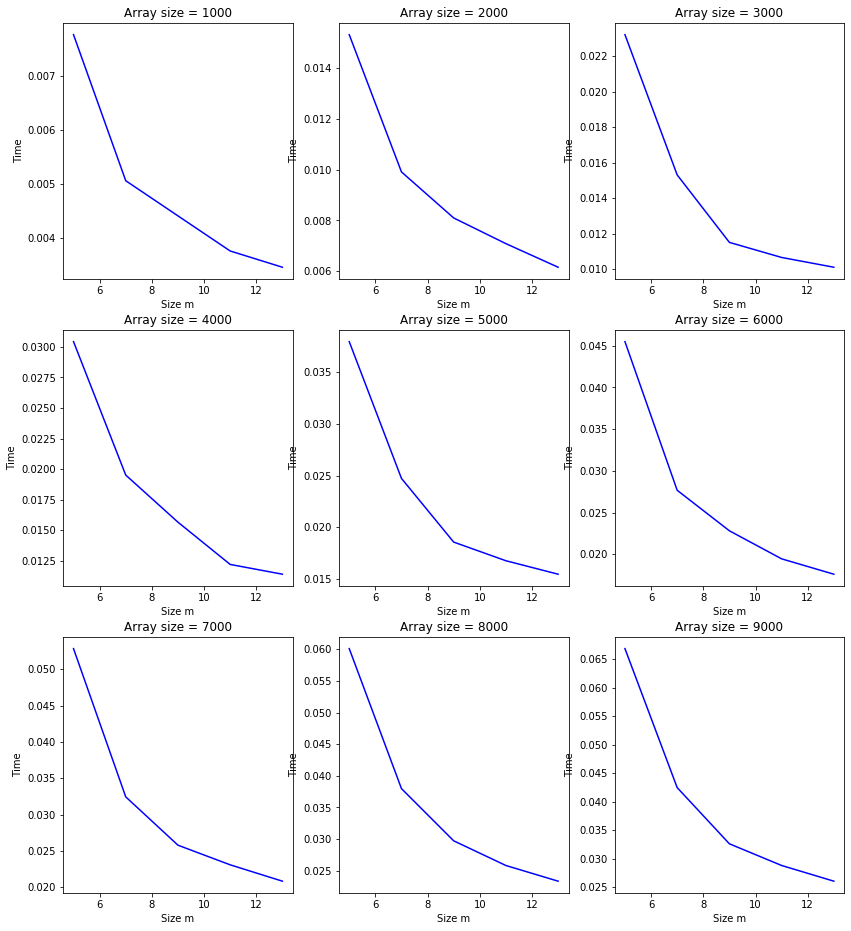

In [18]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 3)
idxs = [(i, j) for i in range(3) for j in range(3)]

for n in range(1000,10000,1000):
    m_times = []
    ms = [5,7,9,11,13]
    for m in ms:
        times = []
        for i in range(20):
            current_array = [random.randint(1,100*n) for _ in range(n)]
            k = math.ceil(n/2)
            times.append(time.time())
            deterministic_select(current_array, k, m)
            times[i] = time.time() - times[i]
        m_times.append(np.mean(times))
    ax = axs[idxs[n//1000 - 1][0]][idxs[n//1000 - 1][1]]
    ax.plot(ms, m_times, 'b-')
    ax.set_title('Array size = ' + str(n))
    ax.set(xlabel='Size m')
    ax.set(ylabel='Time')
    
fig.set_figheight(16)
fig.set_figwidth(14)
fig.show()
    